Environment: Gridworld

Task: Get to some point X (given). Avoid red spots (some points are red and the agent doesn’t wanna go on those).

### Info:
GRID: 7 by 5 \
Number of red spots: 4 \
Positions of red spots: red1, red2, red3, red4 = (randomly define locations for each one) \
Red_spots = [(1, 2), (6, 1), (3, 2), (4, 4)]

### S
Location of Agent \
    Agent_pos = (x, y)

Locations of Red Spots: \
Agent Map = Belixef of Possible Locations on Grid \
    Possible_locations = dict((1,1) : False) \
        1st component = location \
        2nd component encodes whether it’s a red spot (true) or safe (false)

### T
Location of Agent \
    Environmental Constraints \
        If agent_pos[0] == 0: P(a = LEFT) = 0  \
        If agent_pos[1] == 0: P(a = DOWN) = 0  \
        If agent_pos[0] ==  6: P(a = RIGHT) = 0  \
        If agent_pos[1] == 4: P(a = UP) = 0 \
If a == RIGHT: agent_pos[0] += 1 \
If a == LEFT: agent_pos[0] -= 1 \
If a == UP: agent_pos[1] += 1 \
If a == DOWN: agent_pos[1] -= 1

### R
Reward_points = 0 \
Redspot: If agent_pos in redspots: reward_points -= 5 \
Endgoal \
    If agent_pos == (4, 6): reward_points += 20


### set of observations (dimensionality of 2)
Observation \
    Observed_spot \
        ((x, y), True/False) \
    Possible_locations.append(observed_spot)

O is set of conditional observation probabilities (prior preference) \
    C = C matrix \
    C[(4,6)] = 1

## Imports

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm

import seaborn as sns

import pymdp
from pymdp import utils

## Auxilary Functions

In [30]:
def plot_grid(grid_locations, num_x = 3, num_y = 3 ):
    """
    Plots the spatial coordinates of GridWorld as a heatmap, with each (X, Y) coordinate 
    labeled with its linear index (its `state id`)
    """

    grid_heatmap = np.zeros((num_x, num_y))
    for linear_idx, location in enumerate(grid_locations):
      y, x = location
      grid_heatmap[y, x] = linear_idx
    sns.set(font_scale=1.5)
    sns.heatmap(grid_heatmap, annot=True, cbar = False, fmt='.0f', cmap='crest')

## Parameters

In [35]:
# grid_dimensions
grid_dims = [7,5]
num_grid_points = np.prod(grid_dims) # total number of grid locations (rows X columns)

# setup matrix
grid = np.arange(num_grid_points).reshape(grid_dims) # arange -> creates list; reshape -> makes it in the shape specified by grid_dims

# define red spots
grid[(1, 2)] = 1
grid[(3, 2)] = 1
grid[(4, 4)] = 1
grid[(6, 1)] = 1

# list of grid positiions
grid_locations = []
it = np.nditer(grid, flags=["multi_index"]) # set up the iterator to go throgh the matrix
while not it.finished:
    grid_locations.append(it.multi_index)
    it.iternext()

grid, grid_locations

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  1,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16,  1, 18, 19],
        [20, 21, 22, 23,  1],
        [25, 26, 27, 28, 29],
        [30,  1, 32, 33, 34]]),
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (1, 4),
  (2, 0),
  (2, 1),
  (2, 2),
  (2, 3),
  (2, 4),
  (3, 0),
  (3, 1),
  (3, 2),
  (3, 3),
  (3, 4),
  (4, 0),
  (4, 1),
  (4, 2),
  (4, 3),
  (4, 4),
  (5, 0),
  (5, 1),
  (5, 2),
  (5, 3),
  (5, 4),
  (6, 0),
  (6, 1),
  (6, 2),
  (6, 3),
  (6, 4)])

In [28]:
# location of the agent hidden state
agent_pos = (0,0)

## Visual gridworld

### Set up figure & grid
fig: The entire figure (canvas) where the grid and visual elements will be plotted; ax: The specific axis (plot area) for drawing the grid.

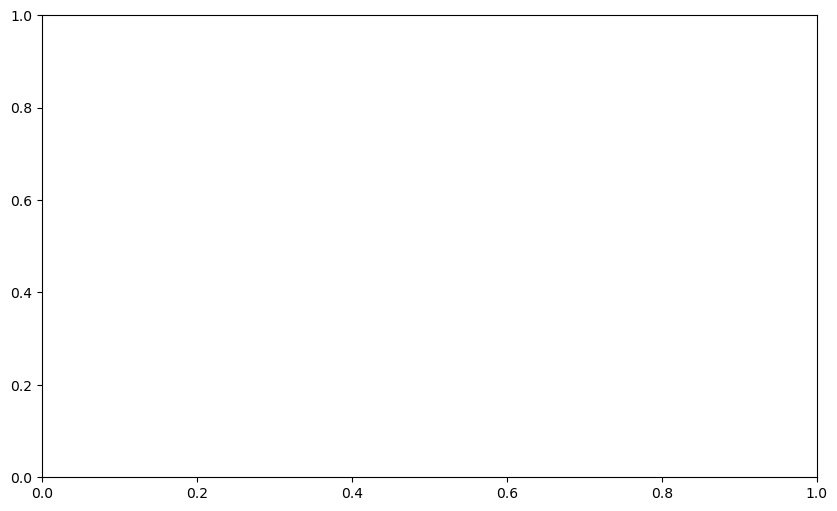

In [10]:
# fig, ax = plt.subplots(figsize=(10, 6))

Next step is to create the visual grid. \
np.meshgrid defines/creates it. \
The other functions are purely visuals. \
FIGURE OUT WHY WE HAVE TO REDEFINE IT LATER

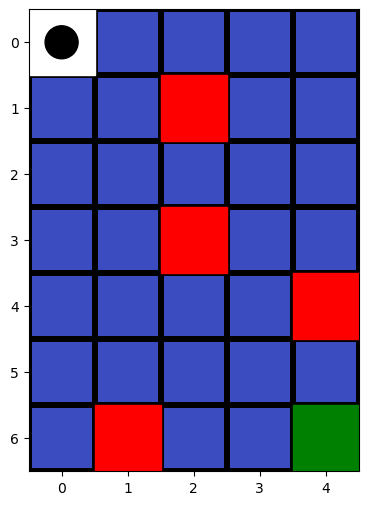

In [26]:
# fig, ax = plt.subplots(figsize=(8, 6))  # Properly sized figure

# # Create grid
# X, Y = np.meshgrid(np.arange(grid_dims[1] + 1), np.arange(grid_dims[0] + 1))  # 5x7 grid
# h = ax.pcolormesh(X, Y, np.zeros(grid_dims), edgecolors='k', linewidth=3, cmap='coolwarm')  # Base grid

# # Add goal (green square)
# ax.add_patch(
#     plt.Rectangle((4, 6), width=1, height=1, color='green')  # Adjusted coordinates for grid alignment
# )

# # Add red obstacles
# red_obstacles = [(2, 1), (1, 6), (2, 3), (4, 4)]  # List of (x, y) coordinates for red obstacles
# for red in red_obstacles:
#     ax.add_patch(
#         plt.Rectangle((red[0], red[1]), width=1, height=1, color='red')
#     )

# # Add entry point (white square)
# ax.add_patch(
#     plt.Rectangle((0, 0), width=1, height=1, color='white')
# )

# # Add agent (black circle)
# ax.add_patch(
#     plt.Circle((agent_pos[0] + 0.5, agent_pos[1] + 0.5), radius=0.25, color='black')
# )

# # Set grid limits and labels
# ax.set_xlim(0, grid_dims[1])
# ax.set_ylim(0, grid_dims[0])
# ax.set_aspect('equal')
# ax.set_xticks(np.arange(grid_dims[1]) + 0.5)
# ax.set_yticks(np.arange(grid_dims[0]) + 0.5)
# ax.set_xticklabels(np.arange(grid_dims[1]))
# ax.set_yticklabels(np.arange(grid_dims[0]))
# plt.gca().invert_yaxis()  # Invert y-axis to match typical grid orientation

# # Show plot
# plt.show()



In [27]:
# fig, ax = plt.subplots(figsize=(10, 6)) # idk why we need to redefine this. FIGURE IT OUT LATER

# # create grid
# X, Y = np.meshgrid(np.arange(grid_dims[1]+1), np.arange(grid_dims[0]+1))
# print(X, Y)
# # grid visuals
# h = ax.pcolormesh(X, Y, np.ones([5, 7]), edgecolors='k', vmin = 0, vmax = 30, linewidth=3, cmap = 'coolwarm')

# # goal
# desired_location = ax.add_patch(
#     plt.Rectangle((4, 6), width=1, height=1, color='green')
# )

# # red spots
# red1 = ax.add_patch(
#     plt.Rectangle((1, 2), width=1, height=1, color='red')
# )
# red2 = ax.add_patch(
#     plt.Rectangle((6, 1), width=1, height=1, color='red')
# )
# red3 = ax.add_patch(
#     plt.Rectangle((3, 2), width=1, height=1, color='red')
# )
# red4 = ax.add_patch(
#     plt.Rectangle((4, 4), width=1, height=1, color='red')
# )

# # entry spot
# entry = ax.add_patch(
#     plt.Rectangle((0, 0), width=1, height=1, color='white')
# )
# agent_icon = ax.add_patch(
#     plt.Circle((agent_pos[0] + 0.5, agent_pos[1] + 0.5), radius=0.25, color='black')
# )


# desired_location = ax.add_patch(
#     plt.Rectangle((6, 4), width=1, height=1, color='green')
# )

# # ax.set_xlim(0, grid_dims[1])
# # ax.set_ylim(0, grid_dims[0])
# # ax.set_aspect('equal')
# # ax.set_xticks(np.arange(grid_dims[1]) + 0.5)
# # ax.set_yticks(np.arange(grid_dims[0]) + 0.5)
# # ax.set_xticklabels(np.arange(grid_dims[1]))
# # ax.set_yticklabels(np.arange(grid_dims[0]))

# plt.show()

## Generative Model

In [8]:
# # reward
# reward_conditions_positive = ['END GOAL']
# reward_locations_positive = [(6,4)]
# reward_conditions_negative = ['RED1', 'RED2', 'RED3', 'RED4']
# reward_locations_negative = [(1, 2), (6, 1), (3, 2), (4, 4)]

In [20]:
# context_names = ['SAFE', 'RED']
# choice_names = ['UP', 'DOWN', 'LEFT', 'RIGHT']

# num_states = [len(context_names), len(choice_names)]
# num_factors = len(num_states)

# context_action_names = ['Do-nothing']
# choice_action_names = ['Move-up', 'Move-down', 'Move-left', 'Move-right']

# num_controls = [len(context_action_names), len(choice_action_names)]

# loc_obs_attributes = ['SAFE', 'DANGER', 'GOAL']
# # agent's belief about map hidden state
# map_obs = {
#     (0,0) : False,
#     (0, 1) : False,
#     (1, 0) : False,
#     (1, 1) : False,
# }

# num_obs = [len(loc_obs_attribute), len(loc_obs_map)]
# num_modalities = len(num_obs)

The hidden states s have these hidden state factors:
1. Location (as many levels as there are grid locations)

The observations!!:
1. Positions
2. Safety (2 hidden state levels - safe or dangerous/red)

In [67]:
num_states = [len(grid_locations)] # location

safety = ['EMPTY', 'RED'] # obs
goal = ['EMPTY', 'GOAL']

num_obs = [len(grid_locations), len(safety), len(goal)]


### A Array

In [68]:
A_m_shapes = [ [o_dim] + num_states for o_dim in num_obs] # list of shapes of modality-specific A[m] arrays
A = utils.obj_array_zeros(A_m_shapes) # initialize A array to an object array of all-zero subarrays
A_m_shapes # 2 types of observations, one type of state

[[35, 35], [2, 35], [2, 35]]

Location observation modality: A[0]

In [69]:
A[0] = np.eye(num_grid_points)

# Safety observations (probability 1 for the safe state, 0 for the dangerous one)
A[1] = np.zeros((2, num_grid_points))  # safety matrix initialized to 0
A[1][0, 0] = 1  # Safe state (SAFE) for the first grid point, probability 1
A[1][1, 0] = 0  # Danger (RED) for the first grid point, probability 0

A[2][0, 0] = 1

In [70]:
# A = utils.obj_array(num_modalities)

# p_safe = 0.5
# p_danger = 1 - p_safe

# A_loc_attribute = np.zeros((len(loc_obs_attributes), len(context_names), len(choice_names)))

# for choice_id, choice_name in enumerate(choice_names):
#     if choice_name == 'UP':
#         A_loc_attribute[0,:,choice_id] =  

### B Array

In [71]:
num_controls = [5]
B_f_shapes = [ [ns, ns, num_controls[f]] for f, ns in enumerate(num_states)]
B = utils.obj_array_zeros(B_f_shapes)
B_f_shapes


[[35, 35, 5]]

In [72]:
actions = ["UP", "DOWN", "LEFT", "RIGHT", "STAY"]

for action_id, action_label in enumerate(actions):

  for curr_state, grid_location in enumerate(grid_locations):

    y, x = grid_location

    if action_label == "UP":
      next_y = y - 1 if y > 0 else y 
      next_x = x

    elif action_label == "DOWN":
      next_y = y + 1 if y < (grid_dims[0]-1) else y 
      next_x = x
    elif action_label == "LEFT":
      next_x = x - 1 if x > 0 else x 
      next_y = y
    elif action_label == "RIGHT":
      next_x = x + 1 if x < (grid_dims[1]-1) else x 
      next_y = y
    elif action_label == "STAY":
      next_x = x
      next_y = y

    new_location = (next_y, next_x)
    next_state = grid_locations.index(new_location)
    B[0][next_state, curr_state, action_id] = 1.0

### C Vectors (prior preferences)

In [74]:
C = utils.obj_array_zeros(num_obs)

C[1][1] = -5
C[2][1] = 20

### D Vectors: Prior over (initial) hidden states

In [75]:
D = utils.obj_array_uniform(num_states)
D[0] = utils.onehot(grid_locations.index((0,0)), len(grid_locations))